In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [127]:
train_df = pd.read_csv('Train_Data.csv')
test_df = pd.read_csv('Test_Data.csv')

In [128]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())   

SEQN         12
RIAGENDR     18
PAQ605       13
BMXBMI       18
LBXGLU       13
DIQ010       18
LBXGLT       11
LBXIN         9
age_group    14
dtype: int64
SEQN        2
RIAGENDR    2
PAQ605      1
BMXBMI      1
LBXGLU      1
DIQ010      1
LBXGLT      2
LBXIN       1
dtype: int64


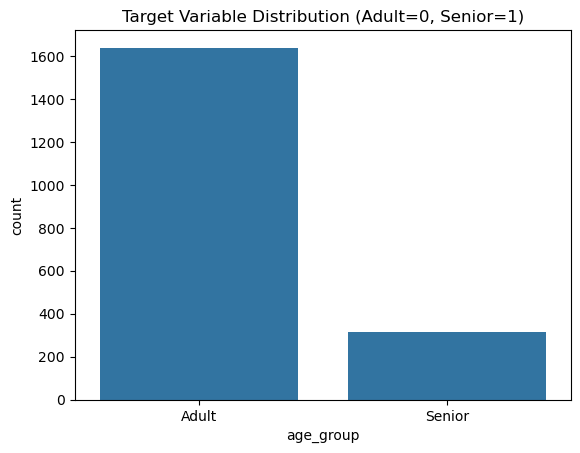

In [129]:
sns.countplot(data=train_df, x='age_group')
plt.title('Target Variable Distribution (Adult=0, Senior=1)')
plt.show()

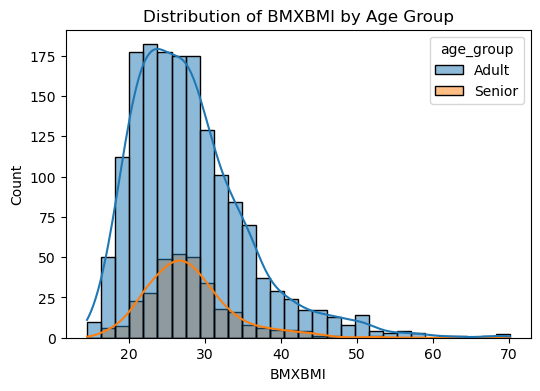

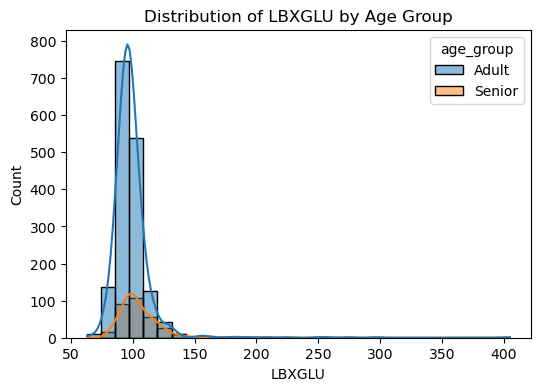

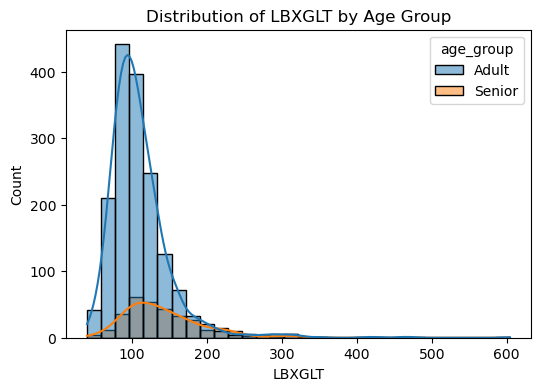

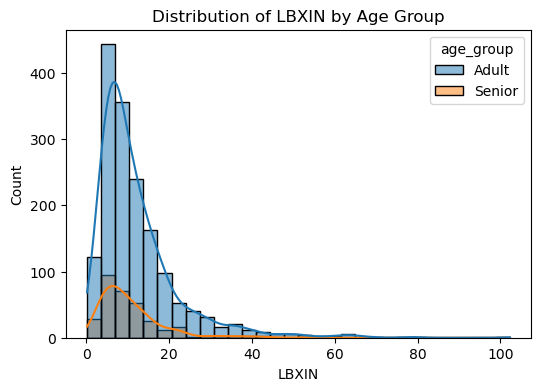

In [130]:
features = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']

for col in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=train_df, x=col, hue='age_group', kde=True, bins=30)
    plt.title(f'Distribution of {col} by Age Group')
    plt.show()

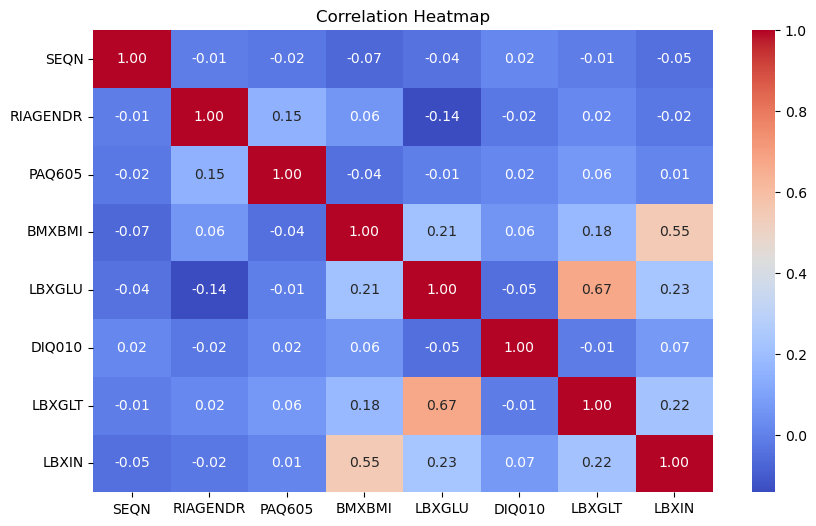

In [131]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


In [132]:
train_df = train_df.dropna(subset=['age_group'])
train_df['age_group'] = train_df['age_group'].map({'Adult': 0, 'Senior': 1})
train_df = train_df.dropna(subset=['age_group'])
train_df['age_group'] = train_df['age_group'].astype(int)

In [133]:
train_df = train_df.fillna(train_df.median(numeric_only=True))
test_df = test_df.fillna(test_df.median(numeric_only=True))

In [134]:
train_df['BMI_GLU_ratio'] = train_df['BMXBMI'] / (train_df['LBXGLU'] + 1e-5)
train_df['GLU_IN_ratio'] = train_df['LBXGLU'] / (train_df['LBXIN'] + 1e-5)
test_df['BMI_GLU_ratio'] = test_df['BMXBMI'] / (test_df['LBXGLU'] + 1e-5)
test_df['GLU_IN_ratio'] = test_df['LBXGLU'] / (test_df['LBXIN'] + 1e-5)

In [135]:
X = train_df.drop(columns=['SEQN', 'age_group'])
y = train_df['age_group']
X_test_final = test_df.drop(columns=['SEQN'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

C:\Users\Atharv\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:05:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [137]:
def evaluate(model, name):
    y_pred = model.predict(X_val)
    print(f"\n{name} Evaluation")
    print("F1 Score:", f1_score(y_val, y_pred))
    print("Accuracy:", accuracy_score(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))
    print(classification_report(y_val, y_pred))

evaluate(lr, "Logistic Regression")
evaluate(rf, "Random Forest")
evaluate(xgb, "XGBoost")


Logistic Regression Evaluation
F1 Score: 0.10344827586206896
Accuracy: 0.8670076726342711
[[336   4]
 [ 48   3]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       340
           1       0.43      0.06      0.10        51

    accuracy                           0.87       391
   macro avg       0.65      0.52      0.52       391
weighted avg       0.82      0.87      0.82       391


Random Forest Evaluation
F1 Score: 0.34210526315789475
Accuracy: 0.8721227621483376
[[328  12]
 [ 38  13]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       340
           1       0.52      0.25      0.34        51

    accuracy                           0.87       391
   macro avg       0.71      0.61      0.64       391
weighted avg       0.85      0.87      0.85       391


XGBoost Evaluation
F1 Score: 0.30952380952380953
Accuracy: 0.8516624040920716
[[320  20]
 [ 38  13]]
              precisio

In [138]:
final_model = rf  # Choose the best model
test_preds = final_model.predict(X_test_final)
submission = pd.read_csv('Sample_Submission.csv')
submission['age_group'] = test_preds
submission.to_csv('submission.csv', index=False)
print("Submission as submission.csv")

Submission as submission.csv
